<div style="border:solid green 2px; padding: 20px">

<b>Привет, Валерий!</b>

Меня зовут Алина Соловьева и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общение на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>    

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

# Анализ оттока клиентов 

# Материалы
Презентация https://disk.yandex.ru/i/WQQVOITIWXbjPA
<br>
Дашборд [https://public.tableau.com/app/profile/valerii.golubstov/viz/BankMetaprom_16837076894890/Dashboard1?publish=yes]

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил ссылку на дашборд</div> 

**Цель исследования:**
Проанализировать клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.
<br>
Данные я получу из файла `bank_scrooge.csv`
- Проведу предобработку данных
- Проведу исследовательский анализ 
- Проведу сегментацию на основе стратегических показателей 
- Проведу проверку статистических гипотез
- Сформулирую промежуточный итог о том, какие показатели влияют на отток

- Напишу вывод о проделанной работе
<br>

*Таким образом исследование пройдет в основных восемь этапов. Каждый из этапов имеет подпункты*:
1. **Обзор данных** 
2. **Предобработка данных**
    1. Проверка на пропуски
    2. Проверка на явные\неявные дубликаты
    3. Проверка на выбросы (аномальные значения)
    4. Кодирование данных
    5. Категоризация
3. **Исследовательский анализ** 
    1. Корреляционный анализ
    2. Анализ распределения
    3. Портреры отточных клиентов
4. **Сегментация**
    1. Формирование сегментов (Не малочисленные. От 800 человек в сегменте)
    2. Анализ сегментов (уровень оттока в сегменте выше среднего уровня оттока по банку)
    3. Рекомендации для сегментов
5. **Проверка статистических гипотез**
    1. Проверка первой гипотезы
    2. Проверка второй гипотезы
6. **Выводы**
7. **Презентация**
<br>
План презентация будет основываться на итогах исследования
8. **Дашборд**


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Молодец, что начинаешь с введения - это важная часть проекта.</div>


## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats as st


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Старайся не допускать дублирования импортов библиотек.</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Прошу прощения за невнимательность. Также убрал библиотеки, которые в проекте не используются</div>    


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Спасибо!</div>


In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


**Промежуточный вывод**
<br>
- У столбцов `score` и `age` неверный тип данных 
- Сразу видны пропуски в `balance` 

## Предобработка данных

**Приведем названия всех столбцов к нижнему регистру и snake_case** 

In [4]:
df.columns = df.columns.str.lower()
df

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


**Столбец `products`**
<br>
Данный столбец показывает количество продуктов банка у клиента. Если количество продуктов равно 0, то соотвественно данный пользователь не является клиентом банка

In [5]:
df[df['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Всего один клиент у которого нет продуктов банка. Удалим данную ошибку

In [6]:
df = df[df['products'] != 0] 

### Проверка на пропуски

In [7]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
userid,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
equity,0.000000
balance,23.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


In [8]:
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Присутствуют пропуски в столбце `balance`, которые были видно еще при обзоре данных и небольшое количество пропусков в столбце `age`, которые можно удалить поскольку они составляют менее 5%. Пропуски в столбце `balance` нельзя так просто удалять


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Согласна :)</div>


**Столбец `age`**

In [9]:
df = df.dropna(subset=['age'])

**Столбец `balance`**

Возможно, что пропуски показывают нулевой баланс. Нужно проверить если в столбце `balance` пользователи с нулевым балансом

In [10]:
df[df['balance'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


Пользователи с нулевым балансом присутствуют, поэтому нельзя заменять пропуски нулями. Медианными значениями заполнять тоже не стоит, потому это повлияет на дальнейшее исследование.

In [11]:
df.loc[df['balance'].isnull()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


**Промежуточный вывод**
<br>
- Оставили пропуски в столбце `balance`, потому что их никак логически не заменить, а удаление приведет к потери большого количества информации. 
- Удалили пропуски в столбце `age` поскольку они составляют менее 5%

### Преобразуем тип данных

In [12]:
df['score'] = df['score'].astype('int64')
df['age'] = df['age'].astype('int64')
#df.info()

### Проверка на дубликаты

**Явные дубликаты**

In [13]:
df.duplicated().sum()

0

In [14]:
df.duplicated(subset=['userid']).sum()

50

In [15]:
df.loc[df.duplicated(subset=['userid'], keep=False)]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860,Ярославль,М,37,5,648594.03,2,1,1,213586.86,1
150,185748,850,Рыбинск,М,36,5,1203376.67,2,0,1,89401.82,1
161,197364,928,Рыбинск,Ж,53,6,1347183.86,2,0,1,168189.49,1
231,190253,823,Рыбинск,М,37,4,373348.39,2,0,1,131947.92,1
690,152479,768,Рыбинск,Ж,42,0,126787.79,4,1,1,143233.23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9659,195884,767,Рыбинск,Ж,45,1,335652.56,3,1,1,100197.67,0
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
9785,168998,895,Рыбинск,М,44,0,282653.53,3,0,0,255296.47,0
9880,217412,886,Ярославль,Ж,35,3,1026172.14,2,1,0,53099.16,0


Так как количество дубликатов 50 это составляет менее 1%, поэтому их можно спокойно удалить

In [16]:
df = df.drop_duplicates(subset=['userid'],keep='first').reset_index(drop=True)
#df['userid'] = df['userid'].astype('int64')

**Неявные дубликаты**

In [17]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [18]:
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [19]:
df['credit_card'].unique()

array([0, 1])

In [20]:
df['churn'].unique()

array([1, 0])

In [21]:
df['products'].unique()

array([2, 3, 1, 4, 5])

In [22]:
df['last_activity'].unique()

array([1, 0])

In [23]:
df['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

**Промежуточный вывод**
<br>
- Удалили явные дубликаты в столбце `userid`
- Неявные дубликаты необнаружены

### Проверка на выбросы

In [24]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9923.00,9923.00,9923.00,9923.00,7664.00,9923.00,9923.00,9923.00,9923.00,9923.00
mean,171739.57,848.72,42.73,2.63,828206.27,1.87,0.68,0.52,147892.55,0.18
std,33698.26,65.39,12.17,1.98,1984121.61,0.79,0.47,0.50,139359.86,0.39
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142720.00,802.00,33.00,0.00,295526.57,1.00,0.00,0.00,75255.86,0.00
50%,172651.00,853.00,40.00,3.00,524927.74,2.00,1.00,1.00,119719.33,0.00
75%,201160.50,900.00,51.00,4.00,980753.67,2.00,1.00,1.00,174673.28,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


На первый взгляд все выглядит нормально и без выбросов. Только столбец `est_salary`, а именно столбец с зарплатой имеет минимальное значение в 2546, что является ниже МРОТ, а по законодательству такого быть не может

In [25]:
df[df['est_salary'] < 15200]['userid'].count()

61

В итоге удалим данную ошибку

In [26]:
df = df[df['est_salary']>15200]

**Промежуточный вывод**
<br>
Аномальные значения столбца `est_salary` удалены

### Кодирование данных

Закодируем два столбца `gender` и `city` бинарными значениями

Создадим второй столбец `city`

In [27]:
df['cityV2'] = df['city']
df['genderV2'] = df['gender']
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,cityV2,genderV2
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [28]:
df = pd.get_dummies(df, columns = ['cityV2','genderV2'])
df = df.rename (
    columns = ({
        'cityV2_Ростов':'Ростов', 
        'cityV2_Рыбинск':'Рыбинск',
        'cityV2_Ярославль':'Ярославль',
        'genderV2_Ж':'female',
        'genderV2_М':'male'}))
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Хорошо.</div>


### Категоризация данных

В дальнейшем при сегментации возможно понадобится категоризация пользователей по возрастным группам

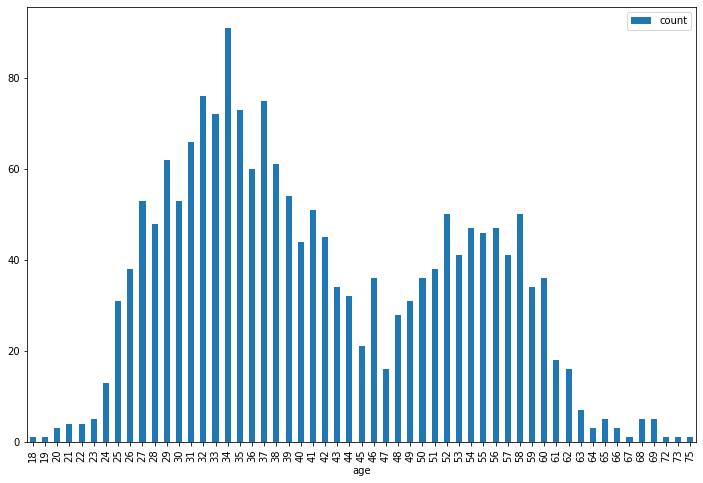

In [29]:
df[df['churn']==1]['age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'}).\
sort_values(by='age').plot(kind='bar', figsize = (12,8), x = 'age', y = 'count');

In [30]:
buckets = [18,24,45,63]

In [31]:
df['age'].value_counts(bins = buckets)

(24.0, 45.0]      6159
(45.0, 63.0]      2830
(17.999, 24.0]     225
Name: age, dtype: int64

Как мы видим большинство пользователей банка находятся в диапазоне возраста между 24-45 годами. Создадим функцию, которая присвоит каждому пользователю определенную возрастную категорию

In [32]:
#ф-ция, которая категоризирует пользователей по возрасту
def category_age(age):
    if 25 > age >= 18:
        return '18-24'
    if 45 >= age >= 25:
        return '25-45'
    if 62 >= age >= 46:
        return '46-62'
    if 63 <= age:
        return '63+'

In [33]:
df['category_age'] = df['age'].apply(category_age)
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,category_age
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,25-45
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,25-45
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,25-45
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,46-62
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,25-45


Чтобы провести корреляционный анализ с возрастными группами их тоже нужно закодировать бинарными переменными

In [34]:
df['category_ageV2'] = df['category_age']

In [35]:
df = pd.get_dummies(df, columns = ['category_ageV2'])
df = df.rename (columns = ({
    'category_ageV2_18-24':'18-24',
    'category_ageV2_25-45':'25-45',
    'category_ageV2_46-62':'46-62', 
    'category_ageV2_63+':'63+'}))
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,category_age,18-24,25-45,46-62,63+
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,0,1,0,1,0,25-45,0,1,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,1,0,1,0,25-45,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,...,0,1,0,1,0,25-45,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,0,0,1,1,0,46-62,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,0,0,1,0,1,25-45,0,1,0,0



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Отлично :) Хорошая предобработка данных.</div>


## Исследовательский анализ

Прежде чем строить графики распределения посмотрим на таблицу корреляций

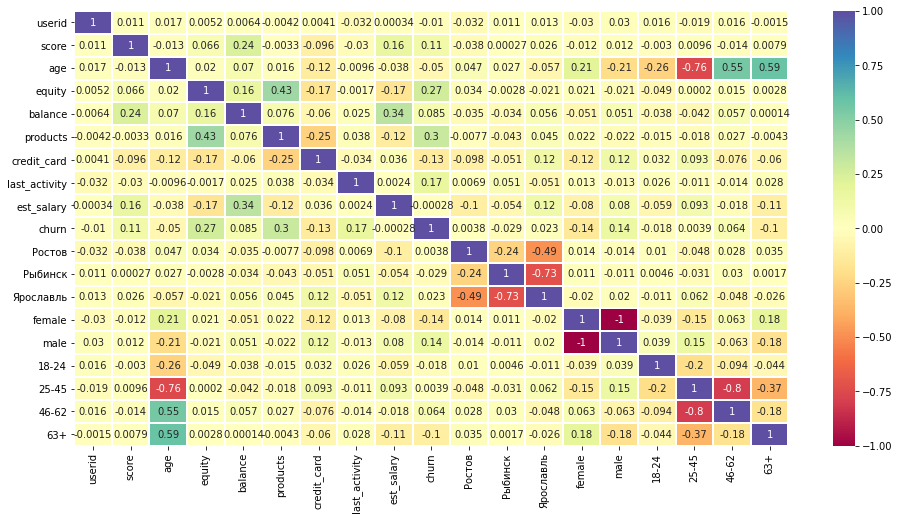

In [36]:
plt.figure(figsize=(16,8))
sns.heatmap (df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'Spectral', linewidths=1)
plt.show()

**Вывод по таблице**
<br>
По таблице видно, что наибольшая корреляция с показателем оттока клиентов связана со столбцами:
- `age`
- `equity`
- `score`
- `products`
- `credit_card`
- `last_activity`
- Пол клиента. Столбцы:`female`,`male`

In [37]:
list_for_graph = ['equity',
                  'male',
                  'score',
                  'products',
                  'age',
                  'credit_card',
                  'female']

for entry in list_for_graph:
    correlation = df['churn'].corr(df[entry])
    print(f'Корреляция между churn и {entry} составляет: {correlation:0.2}')

Корреляция между churn и equity составляет: 0.27
Корреляция между churn и male составляет: 0.14
Корреляция между churn и score составляет: 0.11
Корреляция между churn и products составляет: 0.3
Корреляция между churn и age составляет: -0.05
Корреляция между churn и credit_card составляет: -0.13
Корреляция между churn и female составляет: -0.14



<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Вот этот вывод можно тоже отсортировать, для удобства</div>


<div class="alert alert-info"> <b>Комментарий студента:</b>Надеюсь я все правильно понял. Отсортировал по убыванию</div>    


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Да, верно!</div>


### Столбец `age`

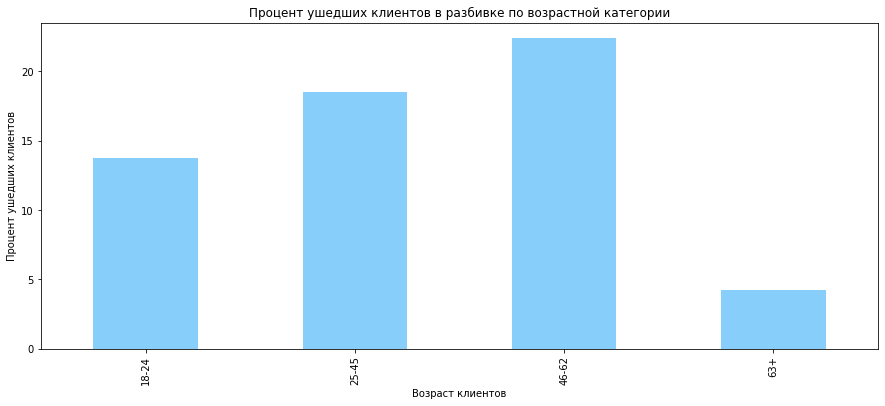

,sum,count,percentage_of_churn
category_age,,,
46-62,611,2728,22.40
25-45,1140,6159,18.51
18-24,31,225,13.78
63+,32,750,4.27


In [38]:
#Напишем функцию, которая будет считать проценты ушедших 
def percentage_of_churn(pdDataFrame):
    return round((pdDataFrame.sum() / pdDataFrame.count()) * 100, 2)

age_pivot = df.pivot_table(index = ['category_age'], values='churn', aggfunc=['sum','count',percentage_of_churn])
age_pivot.columns = age_pivot.columns.droplevel(level=1)

age_pivot['percentage_of_churn'].plot(
    kind='bar', 
    title = 'Процент ушедших клиентов в разбивке по возрастной категории',
    xlabel = 'Возраст клиентов', 
    ylabel = 'Процент ушедших клиентов', figsize = (15,6), 
    color = 'lightskyblue'
    );
plt.show()
age_pivot.sort_values(by='percentage_of_churn',ascending=False)

**Промежуточный вывод:**
<br>
По графику видно, что наиболее отточная возрастная категория это люди 46-62 лет. Данная группа имеет более 20% отточности. Минимальное значение отточности у возрастной группы 63+ лет. Данная группа имеет менее 5% отточности

### Столбец `equity`

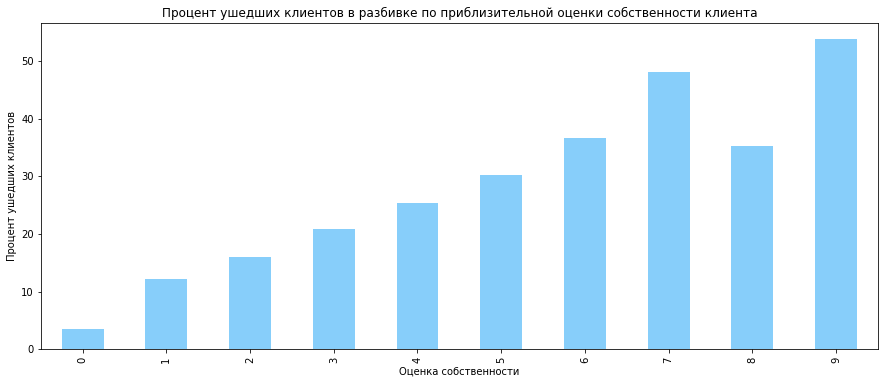

,sum,count,percentage_of_churn
equity,,,
9,7,13,53.85
7,37,77,48.05
6,58,158,36.71
8,6,17,35.29
5,576,1903,30.27
4,464,1829,25.37
3,318,1518,20.95
2,165,1032,15.99
1,93,764,12.17


In [39]:
equity_pivot = df.pivot_table(index = ['equity'], values='churn', aggfunc=['sum','count',percentage_of_churn])
equity_pivot.columns = equity_pivot.columns.droplevel(level=1)

equity_pivot['percentage_of_churn'].plot(
    kind='bar', 
    title = 'Процент ушедших клиентов в разбивке по приблизительной оценки собственности клиента',
    xlabel = 'Оценка собственности', 
    ylabel = 'Процент ушедших клиентов', figsize = (15,6), 
    color = 'lightskyblue'
    );
plt.show()
equity_pivot.sort_values(by='percentage_of_churn',ascending=False)

**Промежуточный вывод**
<br>
При помощи графика можно наблюдать почти прямую зависимость отточности от приблизительной оценки собственности. Чем выше оценка собственности клиента, тем выше отточность. При оценке в 9 отточность более 50%

### Столбец `score`

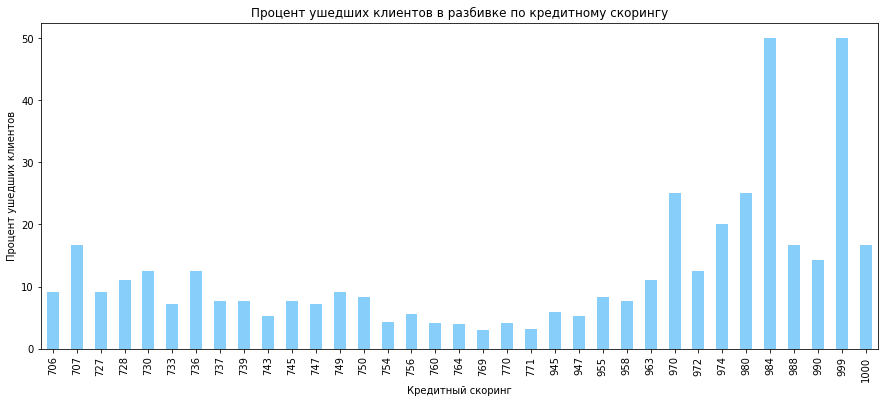

,sum,count,percentage_of_churn
score,,,
999,1,2,50.00
984,1,2,50.00
980,1,4,25.00
970,1,4,25.00
974,1,5,20.00
1000,1,6,16.67
707,1,6,16.67
988,1,6,16.67
990,1,7,14.29


In [40]:
score_pivot = df.pivot_table(index = ['score'], values='churn', aggfunc=['sum','count',percentage_of_churn])
score_pivot.columns = score_pivot.columns.droplevel(level=1)
score_pivot = score_pivot[score_pivot['sum']==1]

score_pivot['percentage_of_churn'].plot(
    kind='bar', 
    title = 'Процент ушедших клиентов в разбивке по кредитному скорингу',
    xlabel = 'Кредитный скоринг', 
    ylabel = 'Процент ушедших клиентов', figsize = (15,6), 
    color = 'lightskyblue'
    );

plt.show()
score_pivot.sort_values(by='percentage_of_churn', ascending=False)

**Промежуточный вывод**
<br>
Сразу хочется отметить, что клиенты уходят из банка с кредитным скорингом не меньше  706 баллов. На графике мы видим определенный тренд, что после достижения отметки в 769 баллов начинает расти процент отточных клиентов. 

### Столбец `products`

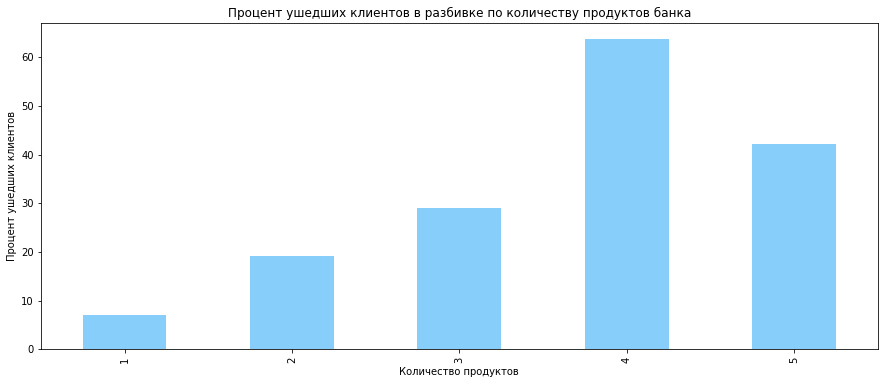

,sum,count,percentage_of_churn
products,,,
4,300,470,63.83
5,8,19,42.11
3,296,1018,29.08
2,976,5062,19.28
1,234,3293,7.11


In [41]:
products_pivot = df.pivot_table(index = ['products'], values='churn', aggfunc=['sum','count',percentage_of_churn])
products_pivot.columns = products_pivot.columns.droplevel(level=1)
products_pivot['percentage_of_churn'].plot(
    kind='bar', 
    title = 'Процент ушедших клиентов в разбивке по количеству продуктов банка',
    xlabel = 'Количество продуктов', 
    ylabel = 'Процент ушедших клиентов', figsize = (15,6), 
    color = 'lightskyblue'
    );

plt.show()
products_pivot.sort_values(by='percentage_of_churn',ascending=False)

**Промежуточный вывод**
<br>
Видно прямую зависимость (до 4 продукта). Чем больше количество продуктов банка, тем выше процент ушедших клиентов. Возможно это можно обосновать тем, что банк может качественно обслуживать клиентов с 1-2 продуктами, а дальше при увеличении количества продуктов банка качество обслуживания снижается. Но тогда непонятно почему после 4 продукта процент ушедших снижается. Можно сделать предположение, что это клиенты, которым обслуживание продуктов не так важно, как сам функционал предлагаемых продуктов. К тому же стоит отметить, что количество клиентов с 5 продуктами банка довольно маленькое.

### Столбец `credit_card`

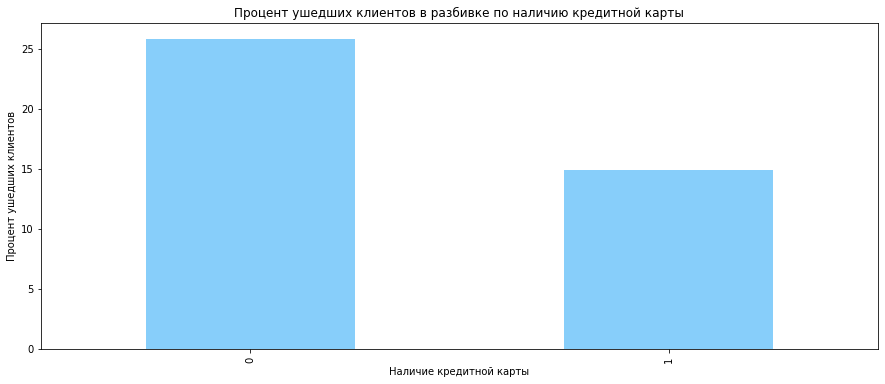

,sum,count,percentage_of_churn
credit_card,,,
0,815,3156,25.82
1,999,6706,14.90


In [42]:
credit_card_pivot = df.pivot_table(index = ['credit_card'], values='churn', aggfunc=['sum','count',percentage_of_churn])
credit_card_pivot.columns = credit_card_pivot.columns.droplevel(level=1)
credit_card_pivot['percentage_of_churn'].plot(
    kind='bar', 
    title = 'Процент ушедших клиентов в разбивке по наличию кредитной карты',
    xlabel = 'Наличие кредитной карты', 
    ylabel = 'Процент ушедших клиентов', figsize = (15,6), 
    color = 'lightskyblue'
    );

plt.show()
credit_card_pivot.sort_values(by='percentage_of_churn',ascending=False)

**Промежуточный вывод**
<br>
Интересно, что процент ушедших пользователей у которых не было в наличии кредитной карты выше, чем процент ушедних пользователей с кредитной картой

### Столбец `last_activity`

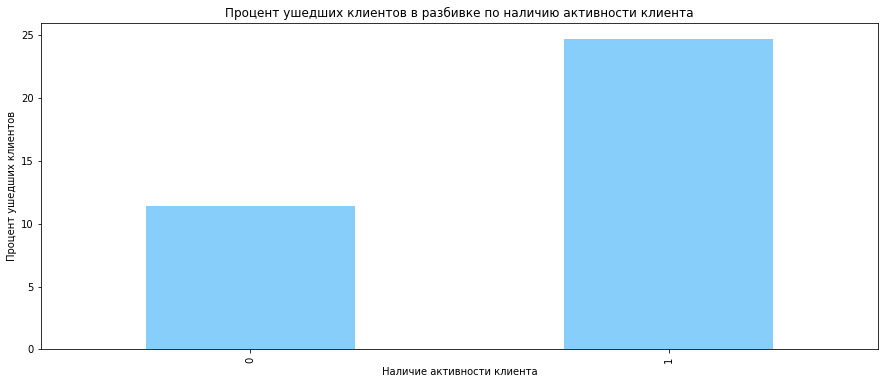

,sum,count,percentage_of_churn
last_activity,,,
1,1276,5161,24.72
0,538,4701,11.44


In [43]:
last_activity_pivot = df.pivot_table(index = ['last_activity'], values='churn', aggfunc=['sum','count',percentage_of_churn])
last_activity_pivot.columns = last_activity_pivot.columns.droplevel(level=1)
last_activity_pivot['percentage_of_churn'].plot(
    kind='bar', 
    title = 'Процент ушедших клиентов в разбивке по наличию активности клиента',
    xlabel = 'Наличие активности клиента', 
    ylabel = 'Процент ушедших клиентов', figsize = (15,6), 
    color = 'lightskyblue'
    );

plt.show()
last_activity_pivot.sort_values(by='percentage_of_churn',ascending=False)

**Промежуточный вывод**
<br>
Процент ушедших пользователей у которых была за последний месяц более чем в два раза выше, чем процент ушедших пользователей, которые никак не взаимодействовали с банком. Возможно, данная особенность связана с качеством обслуживания и взаимодействия клиентов с банком

### Пол клиента. Столбцы `female`,`male`

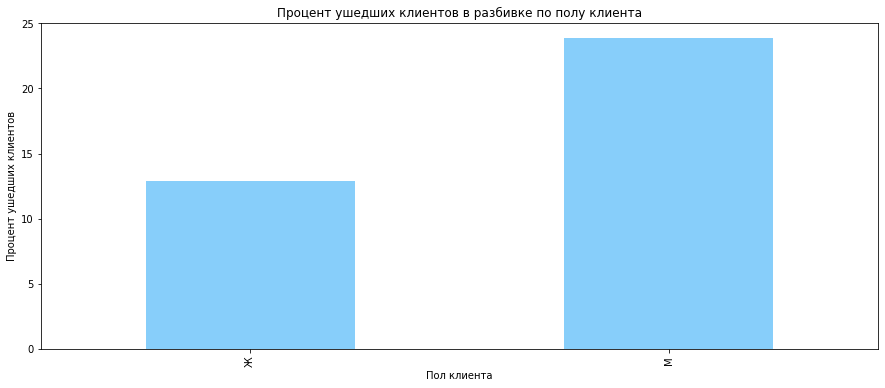

,sum,count,percentage_of_churn
gender,,,
М,1180,4950,23.84
Ж,634,4912,12.91


In [44]:
gender_pivot = df.pivot_table(index = ['gender'], values='churn', aggfunc=['sum','count',percentage_of_churn])
gender_pivot.columns = gender_pivot.columns.droplevel(level=1)
gender_pivot['percentage_of_churn'].plot(
    kind='bar', 
    title = 'Процент ушедших клиентов в разбивке по полу клиента',
    xlabel = 'Пол клиента', 
    ylabel = 'Процент ушедших клиентов', figsize = (15,6), 
    color = 'lightskyblue'
    );

plt.show()
gender_pivot.sort_values(by='percentage_of_churn',ascending=False)

**Промежуточный вывод**
<br>
Процент отточных мужчин почти в два раза выше, чем процент отточных женщин.

### Город

На тепловой карте корреляций этот параметр не указан, однако он важен для формирование портретов и сегментации клиентов 

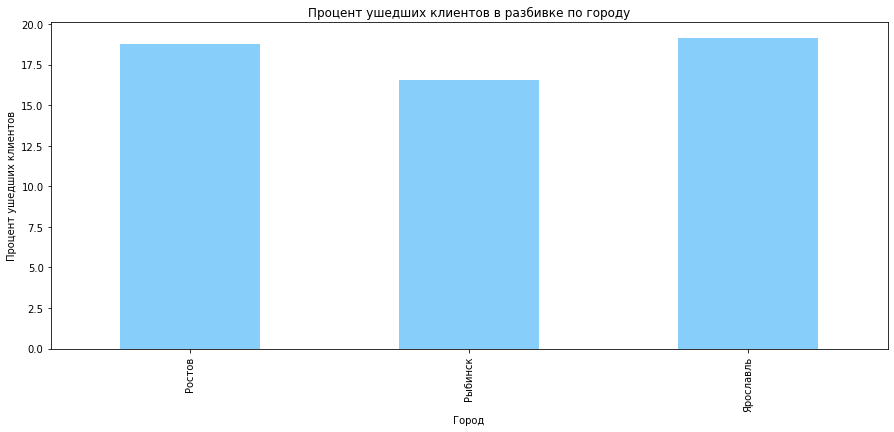

,sum,count,percentage_of_churn
city,,,
Ярославль,1117,5835,19.14
Ростов,262,1397,18.75
Рыбинск,435,2630,16.54


In [45]:
city_pivot = df.pivot_table(index = ['city'], values='churn', aggfunc=['sum','count',percentage_of_churn])
city_pivot.columns = city_pivot.columns.droplevel(level=1)
city_pivot['percentage_of_churn'].plot(
    kind='bar', 
    title = 'Процент ушедших клиентов в разбивке по городу',
    xlabel = 'Город', 
    ylabel = 'Процент ушедших клиентов', figsize = (15,6), 
    color = 'lightskyblue'
    );

plt.show()
city_pivot.sort_values(by='percentage_of_churn',ascending=False)

**Промежуточный вывод**
<br>
Наиболее отточные клиенты находятся в Ярославле. Однако относительная разница процентов ушедних клиентов в разбивке по городам незначительна, так что можно считать, что отток пользователей происходит равномерно


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️В принципе, с выводами согласна ;)</div>


### Формирование портретов отточных клиентов
<br>
На основе корреляционного анализа и анализа распределений составим портреты отточных пользователей

### Портрет №1


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Только не портер, а портрет :)</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Упс... </div>    


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Только не портрер, а портрет)))</div>


- Возраст: 46-62
- Оценка собственности: 5 
- Кредитный скоринг: выше 770
- Количество продуктов банка: больше 3 
- Наличие кредитной карты: нет
- Наличие активности клиента: да
- Пол клиента: мужской
- Город: любой

In [46]:
portrait_1 = df.query (
    'age > 46 and age <= 62 \
    and equity >=5 \
    and score >= 770 \
    and products >= 3 \
    and credit_card == 0 \
    and last_activity == 1 \
    and male == 1 \
    and churn == 1') 
print("Количество клиентов в портрете:",len(portrait_1))
portrait_1

Количество клиентов в портрете: 18


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,category_age,18-24,25-45,46-62,63+
399,212030,867,Ярославль,М,59,5,851896.68,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
1291,131565,826,Ярославль,М,60,5,737821.34,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
1419,220656,899,Ярославль,М,59,5,1682723.25,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
1709,167518,870,Ярославль,М,52,5,775269.74,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
2616,150673,978,Рыбинск,М,53,6,2582959.96,4,0,1,...,0,1,0,0,1,46-62,0,0,1,0
2681,227234,832,Ярославль,М,55,5,585528.59,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
2815,210656,920,Ярославль,М,61,5,1821523.00,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
3256,228880,890,Ярославль,М,54,5,3582411.37,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
3849,198175,924,Ярославль,М,55,5,1675198.33,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
4071,228827,927,Ярославль,М,57,7,3134542.35,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0


### Портрет №2

- Возраст: 46-62
- Оценка собственности: 5 и выше
- Кредитный скоринг: 770 и выше
- Количество продуктов банка: 3 и выше 
- Наличие кредитной карты: нет
- Наличие активности клиента: да
- Пол клиента: женский
- Город: любой

In [47]:
portrait_2 = df.query (
    'age > 46 and age <= 62 \
    and equity >= 5 \
    and score >= 770 \
    and products >= 3 \
    and credit_card == 0 \
    and last_activity == 1 \
    and male == 0 \
    and churn == 1') 
print("Количество клиентов в портрете:",len(portrait_2))
portrait_2

Количество клиентов в портрете: 16


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,category_age,18-24,25-45,46-62,63+
148,122769,868,Ростов,Ж,58,5,1334745.59,4,0,1,...,1,0,0,1,0,46-62,0,0,1,0
859,177840,802,Рыбинск,Ж,51,5,1146872.86,3,0,1,...,0,1,0,1,0,46-62,0,0,1,0
1205,213664,807,Ярославль,Ж,54,5,478592.43,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
3707,219312,889,Ярославль,Ж,60,5,725760.89,4,0,1,...,0,0,1,1,0,46-62,0,0,1,0
4122,208057,856,Ярославль,Ж,52,5,1700165.08,4,0,1,...,0,0,1,1,0,46-62,0,0,1,0
4500,226400,936,Ярославль,Ж,61,5,3301164.33,4,0,1,...,0,0,1,1,0,46-62,0,0,1,0
5000,210005,885,Ярославль,Ж,55,5,1316966.94,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
6077,213759,868,Ярославль,Ж,59,5,1548910.65,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
7017,200430,774,Ярославль,Ж,51,5,1620179.14,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
7295,203628,862,Ярославль,Ж,56,5,942423.50,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0


### Портрет №3

- Возраст: 25-45
- Оценка собственности: 5 и выше
- Кредитный скоринг: 800 и выше
- Количество продуктов банка: 3 и выше 
- Наличие кредитной карты: нет
- Наличие активности клиента: да
- Пол клиента: любой
- Город: любой

In [48]:
portrait_3 = df.query (
    'age > 25 and age <= 45 \
    and equity >= 5 \
    and score >= 770 \
    and products >= 3 \
    and credit_card == 0 \
    and last_activity == 1 \
    and churn == 1') 
print("Количество клиентов в портрете:",len(portrait_3))
portrait_3

Количество клиентов в портрете: 49


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,category_age,18-24,25-45,46-62,63+
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0
81,223978,850,Рыбинск,М,34,5,351583.16,4,0,1,...,0,1,0,0,1,25-45,0,1,0,0
475,140383,908,Ярославль,М,33,5,649294.72,4,0,1,...,0,0,1,0,1,25-45,0,1,0,0
734,170176,893,Ярославль,М,27,5,499315.41,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0
847,115095,880,Ярославль,Ж,34,5,956027.03,3,0,1,...,0,0,1,1,0,25-45,0,1,0,0
936,134107,848,Ростов,М,26,5,218655.27,4,0,1,...,1,0,0,0,1,25-45,0,1,0,0
980,153716,857,Ярославль,Ж,28,7,317884.70,3,0,1,...,0,0,1,1,0,25-45,0,1,0,0
1147,226891,864,Ярославль,М,39,5,920418.77,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0
1166,194256,892,Ярославль,Ж,37,5,1182532.82,3,0,1,...,0,0,1,1,0,25-45,0,1,0,0
1204,223416,901,Ярославль,М,27,5,1007657.77,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0


### Портрет №4

- Возраст: 25-45
- Оценка собственности: 5 и меньше
- Кредитный скоринг: 750 и выше
- Количество продуктов банка: 3 и выше 
- Наличие кредитной карты: нет
- Наличие активности клиента: да
- Пол клиента: любой
- Город: любой

In [49]:
portrait_4 = df.query (
    'age > 25 and age <= 45 \
    and equity <= 5 \
    and score >= 750 \
    and products >= 3 \
    and credit_card == 0 \
    and last_activity == 1 \
    and churn == 1') 
print("Количество клиентов в портрете:",len(portrait_4))
portrait_4

Количество клиентов в портрете: 93


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,category_age,18-24,25-45,46-62,63+
72,156677,873,Ярославль,М,39,5,915959.85,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0
81,223978,850,Рыбинск,М,34,5,351583.16,4,0,1,...,0,1,0,0,1,25-45,0,1,0,0
177,147950,899,Ярославль,М,37,4,2229215.25,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0
238,150336,929,Рыбинск,Ж,34,4,1514214.91,4,0,1,...,0,1,0,1,0,25-45,0,1,0,0
475,140383,908,Ярославль,М,33,5,649294.72,4,0,1,...,0,0,1,0,1,25-45,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8913,204682,916,Ярославль,Ж,45,3,3899565.50,3,0,1,...,0,0,1,1,0,25-45,0,1,0,0
9052,134847,854,Ярославль,Ж,36,4,1460367.50,4,0,1,...,0,0,1,1,0,25-45,0,1,0,0
9181,212539,855,Ярославль,Ж,44,1,715778.05,3,0,1,...,0,0,1,1,0,25-45,0,1,0,0
9376,195167,821,Ростов,Ж,45,5,1390546.09,3,0,1,...,1,0,0,1,0,25-45,0,1,0,0


### Портрет №5

- Возраст: 25-45
- Оценка собственности: 5 и меньше
- Кредитный скоринг: 750 и выше
- Количество продуктов банка: 3 и выше 
- Наличие кредитной карты: да
- Наличие активности клиента: да
- Пол клиента: мужской
- Город: любой

In [50]:
portrait_5 = df.query (
    'age > 25 and age <= 45 \
    and equity <= 5 \
    and score >= 750 \
    and products >= 3 \
    and credit_card == 1 \
    and last_activity == 1 \
    and male == 1 \
    and churn == 1') 
print("Количество клиентов в портрете:",len(portrait_5))
portrait_5

Количество клиентов в портрете: 86


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,category_age,18-24,25-45,46-62,63+
160,171716,908,Рыбинск,М,30,3,245237.57,4,1,1,...,0,1,0,0,1,25-45,0,1,0,0
208,214357,819,Ярославль,М,34,3,1228101.55,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
578,202301,784,Рыбинск,М,39,1,226099.72,3,1,1,...,0,1,0,0,1,25-45,0,1,0,0
713,216950,835,Ярославль,М,36,4,286786.97,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
892,171828,862,Ярославль,М,34,3,2438640.04,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,167808,927,Ярославль,М,34,4,327988.84,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
9213,201000,849,Рыбинск,М,39,5,255958.81,4,1,1,...,0,1,0,0,1,25-45,0,1,0,0
9420,179951,883,Ярославль,М,39,4,1836905.54,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
9495,208116,839,Ярославль,М,37,4,978290.16,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0


### Портрет №6

- Возраст: 46-62
- Оценка собственности: 5 и меньше
- Кредитный скоринг: 750 и выше
- Количество продуктов банка: 3 и выше 
- Наличие кредитной карты: да
- Наличие активности клиента: да
- Пол клиента: любой
- Город: любой

In [51]:
portrait_6 = df.query (
    'age > 46 and age <= 62 \
    and equity <= 5 \
    and score >= 750 \
    and products >= 3 \
    and credit_card == 1 \
    and last_activity == 1 \
    and male == 1 \
    and churn == 1') 
print("Количество клиентов в портрете:",len(portrait_6))
portrait_6

Количество клиентов в портрете: 29


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,category_age,18-24,25-45,46-62,63+
457,228963,887,Ярославль,М,62,5,3360245.32,4,1,1,...,0,0,1,0,1,46-62,0,0,1,0
972,178092,888,Ярославль,М,48,4,315074.84,4,1,1,...,0,0,1,0,1,46-62,0,0,1,0
1101,221266,853,Ярославль,М,49,5,774481.22,4,1,1,...,0,0,1,0,1,46-62,0,0,1,0
1454,190099,928,Рыбинск,М,53,4,2414446.77,4,1,1,...,0,1,0,0,1,46-62,0,0,1,0
1490,190295,942,Ростов,М,50,5,2451414.16,4,1,1,...,1,0,0,0,1,46-62,0,0,1,0
1531,132253,826,Ярославль,М,47,5,1462399.64,3,1,1,...,0,0,1,0,1,46-62,0,0,1,0
2199,136002,857,Ростов,М,57,2,343682.57,4,1,1,...,1,0,0,0,1,46-62,0,0,1,0
2216,220902,771,Рыбинск,М,52,3,1014910.13,3,1,1,...,0,1,0,0,1,46-62,0,0,1,0
2719,166399,871,Рыбинск,М,57,5,696584.72,4,1,1,...,0,1,0,0,1,46-62,0,0,1,0
3396,173968,810,Ростов,М,55,5,1406565.31,3,1,1,...,1,0,0,0,1,46-62,0,0,1,0


## Сегментация клиентов
<br> 
По итогом исследовательского анализа составим сегменты высокооточных клиентов

### Сегмент №1

- Возраст: 25-45
- Оценка собственности: 5 и ниже
- Кредитный скоринг: 750 и выше
- Количество продуктов банка: больше или равно 1
- Наличие кредитной карты: нет
- Наличие активности клиента: да
- Пол клиента: любой
- Город: любой

In [52]:
#Общее количество клиентов в сегменте:
seg_1 = df.query(
    'age > 25 and age <= 45 \
    and equity <= 5  \
    and products >= 1\
    and score >= 750 \
    and credit_card == 0 \
    and last_activity == 1')
print('Общее количество клиентов в сегменте №1:', len(seg_1))

#Количество отточных клиентов в сегменте:
seg_1_churn1 = df.query(
    'age > 25 and age <= 45 \
    and equity <= 5 \
    and products >= 1\
    and score >= 750 \
    and credit_card == 0 \
    and last_activity == 1 \
    and churn == 1')
print('Количество отточных клиентов в сегменте №1:', len(seg_1_churn1))

# Рассчитаем долю отточных пользователей:
share_1 = len(seg_1_churn1) / len(seg_1) * 100 
print('Доля отточных пользователей в сегменте №1:', str(round(share_1,2)) + '%')

Общее количество клиентов в сегменте №1: 873
Количество отточных клиентов в сегменте №1: 340
Доля отточных пользователей в сегменте №1: 38.95%


### Сегмент №2

- Возраст: 25-45
- Оценка собственности: 4 и выше
- Кредитный скоринг: 730 и выше
- Количество продуктов банка: больше или равно 1
- Наличие кредитной карты: да
- Наличие активности клиента: да
- Пол клиента: любой
- Город: любой

In [53]:
#Общее количество клиентов в сегменте:
seg_2 = df.query(
    'age > 25 and age <= 45 \
    and equity >= 4   \
    and products >= 1\
    and score >= 730 \
    and credit_card == 1 \
    and last_activity == 1')
print('Общее количество клиентов в сегменте №2:', len(seg_2))


#Количество отточных клиентов в сегменте:
seg_2_churn1 = df.query(
    'age > 25 and age <= 45 \
    and equity <= 4 \
    and products >= 1\
    and score >= 730 \
    and credit_card == 1 \
    and last_activity == 1\
    and churn == 1')
print('Количество отточных клиентов в сегменте №2:', len(seg_2_churn1))

# Рассчитаем долю отточных пользователей:
share_2 = len(seg_2_churn1) / len(seg_2) * 100 
print('Доля отточных пользователей в сегменте №2:', str(round(share_2,2)) + '%')

Общее количество клиентов в сегменте №2: 799
Количество отточных клиентов в сегменте №2: 288
Доля отточных пользователей в сегменте №2: 36.05%


### Сегмент №3

Посколько основные клиенты банка - люди от 25-45 лет, но нужно также задеть вторую возрастную группу по величине (46-62), то ослабим критерии для данного сегмента

- Возраст: 46-62
- Оценка собственности: не учитывается
- Кредитный скоринг: 650 и выше
- Количество продуктов банка: больше или равно 2
- Наличие кредитной карты: нет
- Наличие активности клиента: не учитывается
- Пол клиента: любой
- Город: любой

In [54]:
#Общее количество клиентов в сегменте:
seg_3 = df.query(
    'age > 46 and age <= 62 \
    and products >= 2 \
    and score >= 650 \
    and credit_card == 0')
print('Общее количество клиентов в сегменте №3:', len(seg_3))


#Количество отточных клиентов в сегменте:
seg_3_churn1 = df.query(
    'age > 46 and age <= 62 \
    and products >= 2\
    and score >= 650 \
    and credit_card == 0 \
    and churn == 1')
print('Количество отточных клиентов в сегменте №3:', len(seg_3_churn1))

# Рассчитаем долю отточных пользователей:
share_3 = len(seg_3_churn1) / len(seg_3) * 100 
print('Доля отточных пользователей в сегменте №3:', str(round(share_3,2)) + '%')

Общее количество клиентов в сегменте №3: 827
Количество отточных клиентов в сегменте №3: 278
Доля отточных пользователей в сегменте №3: 33.62%


### Рекомендации для сегментов

**Cегмент №1**
<br>
- Возраст: 25-45
- Оценка собственности: 5 и ниже
- Кредитный скоринг: 750 и выше
- Количество продуктов банка: больше или равно 1
- Наличие кредитной карты: нет
- Наличие активности клиента: да
- Пол клиента: любой
- Город: любой
<br>

*Процент отточности 39%*
<br>

**Рекомендации:** 
1. Предложить выгодные условия по страхованию собственности
2. Проанализировать годовую корзину пользователей и предложить повышенный кэшбек на категории товаров из корзины
3. Рассмотреть идею переквалификации сотрудников кол-центра\улучшить качество взаимодействия с клиентами
4. Предложить оформить кредитную карту

**Cегмент №2**
<br>
- Возраст: 25-45
- Оценка собственности: 4 и выше
- Кредитный скоринг: 730 и выше
- Количество продуктов банка: больше или равно 1
- Наличие кредитной карты: да
- Наличие активности клиента: да
- Пол клиента: любой
- Город: любой
<br>

*Процент отточности 36%*
<br>

**Рекомендации:** 
1. Предложить более выгодные условия для кредитных карт
2. Рассмотреть программу бонусов для владельцев кредитных карт
3. Предложить продукты банка на выгодных условиях, что повысит удержание клиентов

**Cегмент №3**
<br>
- Возраст: 46-62
- Оценка собственности: не учитывается
- Кредитный скоринг: 650 и выше
- Количество продуктов банка: больше или равно 2
- Наличие кредитной карты: нет
- Наличие активности клиента: не учитывается
- Пол клиента: любой
- Город: любой
<br>

*Процент отточности 34%*
<br>

**Рекомендации:** 
1. Предложить оформить кредитную карту
2. Система льгот для пенсионеров
3. Система кешбэка на товары для людей пенсионного и предпенсионного возраста
4. Предложить открыть накопительный (с высоким процентом для людей пенсионного и предпенсионного возраста) счет в банке



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Отличные сегменты и конкретные рекомендации - "не к чему придраться", как говорится
</div>


## Проверка статистических гипотез

### Гипотеза №1 : Различие доходов оставшихся и отточных клиентов
<br>

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Средние доходы (est_salary) оставшихся клиентов = средние доходы (est_salary) отточных клиентов
H_1: Средние доходы (est_salary) оставшихся клиентов ≠ средние доходы (est_salary) отточных клиентов
alpha = 0.05
```

Для проверки гипотезы проведем t-test:

In [55]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    df[df['churn']==0]['est_salary'],
    df[df['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние доходы отличаются')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 0.9753337598864819
Не можем отвергнуть нулевую гипотезу.


**Вывод**
<br>
Проведенный t-test показал, что нулевую гипотезу об отсутствии различий в доходах отточных и оставшихся клиентов опровергнуть не удалось.

### Гипотеза №2 : Различие в наличии и отсутвии кредитных карт у оставшихся и отточных клиентов 
<br>

Сформулируем нулевую и альтернативную гипотезы:

```
H_0: Средние количество кредитных карт (credit_card) оставшихся клиентов = Cредние количество кредитных карт (credit_card) отточных клиентов
H_1: Средние количество кредитных карт (credit_card) оставшихся клиентов ≠ Cредние количество кредитных карт (credit_card) отточных клиентов
alpha = 0.05
```

Для проверки гипотезы проведем t-test:

In [56]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    df[df['churn']==0]['credit_card'],
    df[df['churn']==1]['credit_card'], equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 1.5531010437429429e-34
Отвергаем нулевую гипотезу.


**Вывод**
<br>
t-test выявил наличие статистически значимой разницы между оставшимися и отточными пользователями - наличие кредитной карты. Было установлено ранее, что ушедшие клиенты реже пользовались кредитной картой 


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Нужно обосновать выбор критерия проверки и уровня значимости.</div>


Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках, что в нашем случае является актуальным. Кроме того, в своей исходной форме, t-критерий предполагает независимость сравниваемых выборок.
<br>
Выбор уровня значимости в 5% обуславливается практическими соображениями, поскольку вероятность ошибки в 5% можно считать допустимой. Также уровень значимости в 5% применяется во многих сферах.

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>    

## Вывод

В ходе исследования при помощи тепловой карты корреляции были выявлены факторы влияющие на отток клиентов
<br>
***Факторы, которые влияют на отток клиентов:***
1. Возраст клиента. Наиболее отточными возрастными группами явлются: 25-45 лет, 46-62 года
2. Приблизительная оценка собственности клиента. Была выявлена прямая зависимость. Чем выше оценка собственности, тем выше процент отточных клиентов
3. Кредитный скоринг. После достижения "рубежа" в 769 баллов процент отточности клиентов начинает расти
4. Количество продуктов банка. Была выявлена прямая зависимость. Чем выше число продуктов банка (до 4), тем выше процент отточных клиентов. Клиенты с 4 продуктами уходят намного чаще, чем остальные
5. Наличие кредитной карты. Процент отточных клиентов без кредитной карты выше, чем у клиентов с кредитной картойъ
6. Последняя активность. Клиенты, которые контактировали с банком уходят намного чаще, чем клиенты, которые с ним не контактировали
7. Пол клиента. Мужчины чаще являются отточными клиентами
<br>
**Сформированы сегменты отточных клиентов и даны рекомендации для каждого сегмента:**
<br>
> Процент отточности каждого сегмента превышает 30%
<br>

***Сегмент №1***
<br>
Рекомендации для сегмента №1: 
1. Предложить выгодные условия по страхованию собственности
2. Проанализировать годовую корзину пользователей и предложить повышенный кэшбек на категории товаров из корзины
3. Рассмотреть идею переквалификации сотрудников кол-центра\улучшить качество взаимодействия с клиентами
4. Предложить оформить кредитную карту
<br>

***Сегмент №2***
<br>
Рекомендации для сегмента №2: 
1. Предложить более выгодные условия для кредитных карт
2. Рассмотреть программу бонусов для владельцев кредитных карт
3. Предложить продукты банка на выгодных условиях, что повысит удержание клиентов
<br>

***Сегмент №3***
<br>
Рекомендации для сегмента №3: 
1. Предложить оформить кредитную карту
2. Система льгот для пенсионеров
3. Система кешбэка на товары для людей пенсионного и предпенсионного возраста
4. Предложить открыть накопительный (с высоким процентом для людей пенсионного и предпенсионного возраста) счет в банка
<br>

**Была проведена проверка *статистических гипотез***:
<br>
- Гипотеза №1 о различии доходов оставшихся и отточных клиентов: не подтвердилась
- Гипотеза №2 о различии в наличии или отсутствии кредитной карты оставшихся и отточных клиентов: подтвердилась


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Валерий, спасибо тебе за твой проект. Все получилось супер, презентация тоже зачтена. Осталось исправить какие-то микромоменты по проекту  и все. Отправляю его тебе, чтобы ты ознакомился с моими комментариями и оставил свои. Если вопросов нет - просто пришли проект обратно, и я его приму. Молодец :) Редко бывает, что с первой итерации практически полностью выполненный проект без критических замечаний. Успехов!</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо большое! Еще хотел бы попросить какие-нибудь полезные ресурсы, советы, чтобы повысить свою конкурентоспособность при приеме на работу.
    <br>Искренне рад, что ты проверяешь мой проект</div> 


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Спасибо за правки, сейчас все точно принято. Дашборд тоже зачтен :) По полезным ресурсам - Есть такой учебник по машинному обучению - 
    
        https://academy.yandex.ru/handbook/ml
Вкупе с аналитикой очень классно помогает. Этот проект тоже можно выполнять с помощью машинного обучения. 
Вот это тоже хорошая статья :
    
        https://pikabu.ru/story/korrelyatsiya_i_kauzalnost_5956601
   В целом, некоторые моменты по коду можно было оптимизировать, советую учить просто синтаксис питона всегда, даже если кажется, что уже все знаешь. Еще раз поздравляю тебя :) Успехов!
</div>
